In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filepath = Path(__file__).parent
filepath = Path(os.path.abspath(''))
print(filepath)

# # infer_dir = filepath / "out_infer"
# models_dir = filepath / 'pred_models'
# # model_name  = 'DeepTTC'
# # model_name  = 'GraphDRP'
# model_name  = 'HIDRA'
# # model_name  = 'IGTD'
# # model_name  = 'PaccMann_MCA'
# infer_dir = models_dir / model_name / "out_infer"

# preds_fname = "test_y_data_predicted.csv"

# canc_col_name = "improve_sample_id"
# drug_col_name = "improve_chem_id"

# target = "PDMR"

# ov_drug_info = pd.read_csv(filepath / "ovarian_data/raw_data/y_data/Drugs_For_OV_Proposal_Analysis.txt", sep="\t")

/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP


In [2]:
def gen_plot(df: pd.DataFrame, fpath: str, tr_data: str, errorbar: bool=False, show: bool=False):
    """ ... """

    canc_col_name = "improve_sample_id"
    
    # Prepend cell names
    # df['improve_sample_id'] = 'pdo: ' + df['improve_sample_id']

    # Pivot the DataFrame
    # df_pivot = df.pivot(index=drug_col_name, columns=canc_col_name, values=['pred_mean', 'pred_std'])
    df_pivot = df.pivot(index='drug_name', columns=canc_col_name, values=['pred_mean', 'pred_std'])

    # df_pivot = df_pivot.sort_values(('pred_mean', '655913~031-T'))
    random_pdo = df['improve_sample_id'].unique()[0]
    df_pivot = df_pivot.sort_values(('pred_mean', random_pdo))
    
    # Plotting
    fig, ax = plt.subplots(figsize=(14, 8))

    # Get the number of drugs and cells
    # drugs = df[drug_col_name].unique()
    drugs = df['drug_name'].unique()
    cells = df[canc_col_name].unique()
    bar_width = 0.4  # Width of the bars
    index = np.arange(len(drugs))  # The label locations

    # Use a color palette from seaborn
    # colors = sns.color_palette("terrain_r", len(cells))
    # colors = sns.color_palette("husl", 9)
    colors = sns.color_palette("pastel")
    # colors = sns.color_palette("muted", 5)
    # colors = sns.color_palette("blight", 5)
    # colors = sns.color_palette("deep", 10)
    # colors = sns.color_palette()

    # Plot each cell
    for i, (cell, color) in enumerate(zip(cells, colors)):
        pred_mean = df_pivot['pred_mean'][cell].values
        pred_std = df_pivot['pred_std'][cell].values
        if errorbar:
            bars = ax.bar(index + i * bar_width, pred_mean, bar_width, yerr=pred_std,
                          label=cell, color=color, capsize=5, ecolor='black',
                          error_kw=dict(linestyle='--', linewidth=1))
            title = f'{model_name}: Predicted AUC and Standard Deviation by Drug and PDO (trained on {tr_data})'
        else:
            bars = ax.bar(index + i * bar_width, pred_mean, bar_width, label=cell,
                          color=color, capsize=5, ecolor='black')
            title = f'{model_name}: Predicted AUC by Drug and PDO (trained on {tr_data})'

        # Add annotations
        for bar, mean in zip(bars, pred_mean):
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2, yval, f'{mean:.2f}', ha='center', va='bottom')

    # Add labels, title, and legend
    ax.set_xlabel('Drug')
    ax.set_ylabel('Predicted AUC (mean across data splits)')
    ax.set_title(title)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(drugs, rotation=45)
    ax.legend()
    ax.grid()

    ax.set_ylim(0.4, None)

    plt.tight_layout()

    # Save the plot to a file
    plt.savefig(fpath, dpi=300)
    plt.show()

In [3]:
# model_name = "DeepTTC"
# model_name = "GraphDRP"
# model_name = "HIDRA"
# model_name = "IGTD"
model_name = "PaccMann_MCA"

source = "CTRPv2"
target = "PDMR"

agg_df = pd.read_csv(filepath / "plots_outdir" / f"agg_preds_{model_name}_{source}_{target}.tsv", sep="\t")

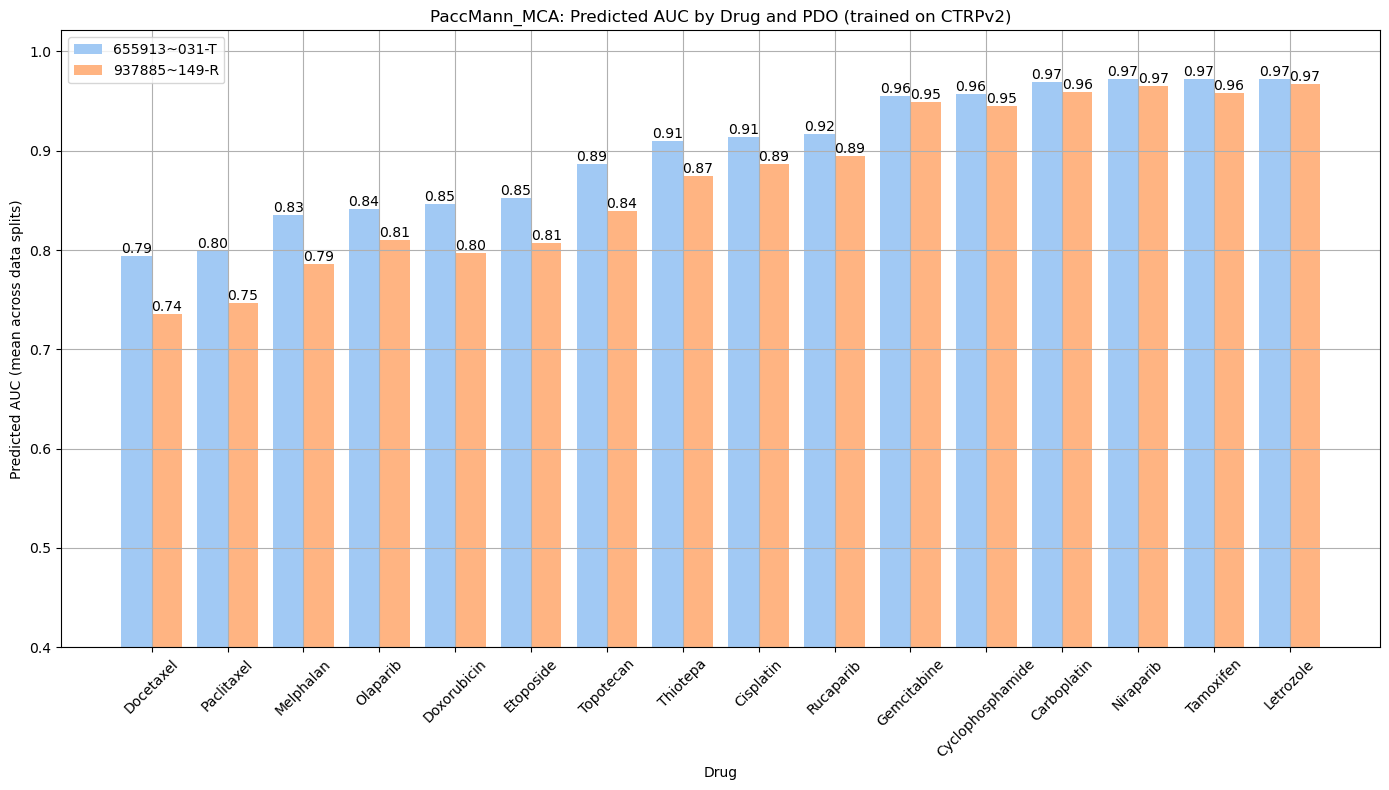

In [4]:
gen_plot(df=agg_df,
         fpath=filepath / "plots_outdir" / f'{model_name}_{source}-{target}.png',
         tr_data=source, errorbar=False, show=True)